In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 6.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessed dataset with sentiment scores and labels saved to: /content/preprocessed_tweets.xlsx
Naive Bayes Accuracy: 0.9151587066152477
Naive Bayes Classification Report:
               precision    recall  f1-score   support

 Body Shaming       1.00      0.04      0.08        23
         None       0.93      0.97      0.95      2674
       Racism       1.00      0.17      0.29        41
Religion Bias       0.79      0.77      0.78       346
       Sexism       0.91      0.74      0.81       287

     accuracy                           0.92      3371
    macro avg       0.93      0.54      0.58      3371
 weighted avg       0.92      0.92      0.91      3371

Best hyperparameters for SVM: {'C': 10}
SVM Accuracy: 0.9768614654405221
SVM Classification Report:
               precision    recall  f1-score   support

 Body Shaming       0.89      0.35      0.50        23
         None       0.97      1.00      0.99      2674
       Racism       1.00      0.44      0.61        41
Religio

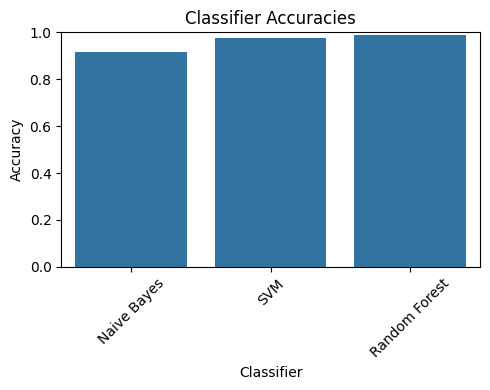

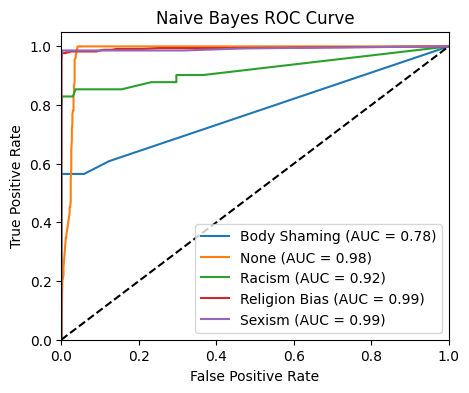

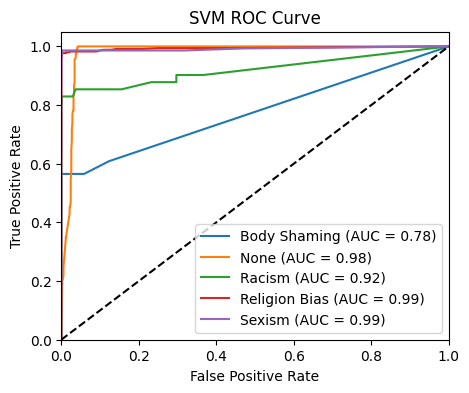

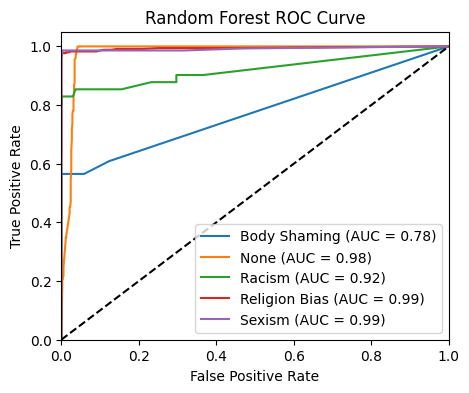

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


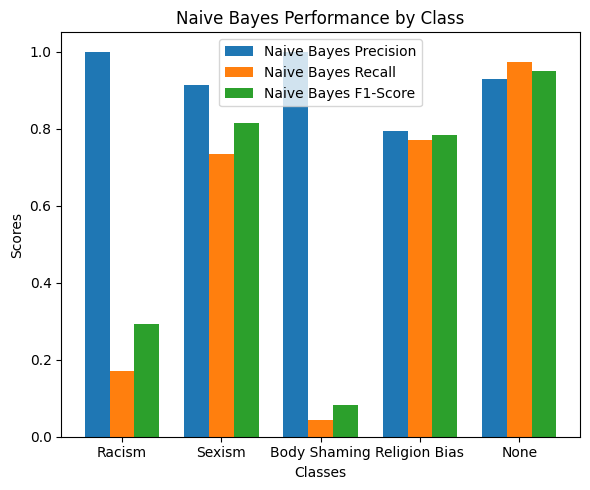

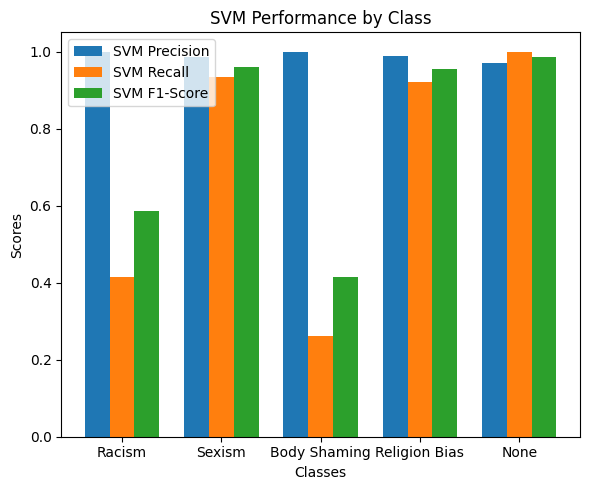

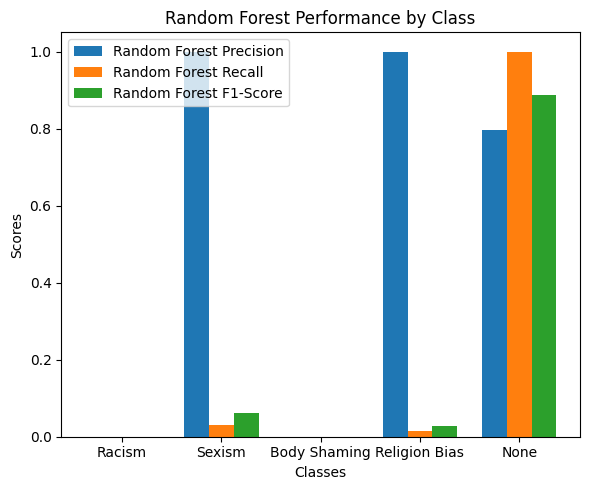

In [ ]:
import pandas as pd
import nltk
import re
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize



# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean a tweet
def clean_tweet(tweet):
    # Convert to lowercase
    tweet=str(tweet)
    tweet = tweet.lower()

    # Replace URLs with a placeholder
    tweet = re.sub(r'http\S+|www\S+|https\S+', 'URL', tweet, flags=re.MULTILINE)
    # Remove usernames (mentions)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove emojis and emoticons
    tweet = emoji.demojize(tweet)
    tweet = re.sub(r':[a-z_&]+:', '', tweet)
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the lemmatized tokens back to form a cleaned tweet
    cleaned_tweet = ' '.join(lemmatized_tokens)

    return cleaned_tweet


# Read the dataset from the Excel file
file_path = '/content/twitter_full_dataset.xlsx'  # Replace with the actual path of your Excel file
df = pd.read_excel(file_path)

# Assuming your tweets are in a column named 'tweet_text'
tweets = df['Text'].tolist()

# Clean each tweet in the dataset
cleaned_tweets = [clean_tweet(tweet) for tweet in tweets]

# Keywords to identify cyberbullying related to racism, sexism, body shaming, and religion bias
racism_keywords = ["black", "white", "racial slur", "race hate", "negro", "nigga"]
sexism_keywords = ["sexist", "sexism", "gender bias", "misogyny", "bitch"]
body_shaming_keywords = ["fat", "skinny", "body hate", "ugly", "weight"]
religion_bias_keywords = ["hindu", "islam", "muslim", "christianity", "terrorist", "jihad"]
hate_speech_keywords = ["slavery","dead","rape","fuck","gay","nasty","rubbish","shit","murder","kill","rapist","homo","asshole","whore","hoe"]

# Lists to store the results
categories = []
sentiment_scores = []
sentiment_labels = []

# Perform sentiment analysis and categorize the tweets
for tweet in cleaned_tweets:
    blob = TextBlob(tweet)
    sentiment_score = blob.sentiment.polarity

    if any(keyword in tweet for keyword in racism_keywords):
        category = "Racism"
    elif any(keyword in tweet for keyword in sexism_keywords):
        category = "Sexism"
    elif any(keyword in tweet for keyword in body_shaming_keywords):
        category = "Body Shaming"
    elif any(keyword in tweet for keyword in religion_bias_keywords):
        category = "Religion Bias"
    else:
        category = "None"

   # Classify sentiment
    if sentiment_score > 0.2:
        sentiment_label = "Positive"
    elif sentiment_score < -0.2:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    categories.append(category)
    sentiment_scores.append(sentiment_score)
    sentiment_labels.append(sentiment_label)

# Create a DataFrame to store the sentiment analysis results
results_df = pd.DataFrame({
    'Cleaned_Tweet': cleaned_tweets,
    'Category': categories,
    'Sentiment Score': sentiment_scores,
    'Sentiment Label': sentiment_labels
})


# Define the path where you want to save the Excel file
excel_file_path = '/content/preprocessed_tweets.xlsx'  # Replace with your desired file path and extension

# Save the DataFrame to an Excel file
results_df.to_excel(excel_file_path, index=False)

# Print a message to confirm that the file has been saved
print(f"Preprocessed dataset with sentiment scores and labels saved to: {excel_file_path}")


# Separate the features (cleaned tweets) and labels (categories)
X = results_df['Cleaned_Tweet']
y = results_df['Category']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different vectorization methods and hyperparameters
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=5, max_df=0.8)
tfidf_transformer = TfidfTransformer()

# Create an instance of RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Experiment with different algorithms and hyperparameters for naive bayes
nb_classifier = MultinomialNB(alpha=0.1)

#SVM
svm_classifier = SVC(kernel='rbf')
svm_param_grid = {
    'C': [0.1, 1, 10],  # Experiment with different values of C
}

#Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Experiment with different numbers of estimators
    'max_depth': [5, 10, None],  # Experiment with different values of max_depth
}

classifiers = [nb_classifier, svm_classifier, rf_classifier]
param_grids = [None, svm_param_grid, rf_param_grid]  # Add None for classifiers without hyperparameters

classifier_names = ['Naive Bayes', 'SVM', 'Random Forest']

accuracies = []
classification_reports = []


for classifier, param_grid, name in zip(classifiers, param_grids, classifier_names):
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('sampler', over_sampler),  # Try oversampling
        ('tfidf', tfidf_transformer),
        ('classifier', classifier)
    ])

    if param_grid is not None:
        grid_search = GridSearchCV(classifier, param_grid, cv=5)
        grid_search.fit(X_train_tfidf, y_train)
        best_params = grid_search.best_params_
        print(f"Best hyperparameters for {name}: {best_params}")

        classifier = grid_search.best_estimator_

 # Transform the training and testing data using the vectorizer and tfidf_transformer
    X_train_counts = vectorizer.fit_transform(X_train)
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

    X_test_counts = vectorizer.transform(X_test)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

    # Train the classifier on the entire training data
    classifier.fit(X_train_tfidf, y_train)

    # Make predictions on the test data
    predictions = classifier.predict(X_test_tfidf)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    print(f"{name} Accuracy:", accuracy)
    print(f"{name} Classification Report:")
    print(report)
    print("="*50)


     # Append accuracy and classification report to lists
    accuracies.append(accuracy)
    classification_reports.append(report)

# Create a bar chart to compare accuracies
plt.figure(figsize=(5, 4))
sns.barplot(x=classifier_names, y=accuracies)
plt.title('Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

def classification_report_to_dict(report):
    report_lines = report.split('\n')
    report_dict = {}
    class_labels = None

    for line in report_lines:
        if line.strip() == '':
            continue

        if 'precision' in line.lower():
            class_labels = line.split()[1:]
        else:
            columns = line.split()
            class_name = columns[0]
            scores = [float(score) for score in columns[1:]]
            report_dict[class_name] = dict(zip(class_labels, scores))

    return report_dict

# Calculate probabilities for each class
y_probs = classifier.predict_proba(X_test_tfidf)

# Binarize the labels for the multiclass ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=classifier.classes_)

################################################################ROC-AUC

# Initialize a dictionary to store ROC and AUC information for each classifier
roc_auc_dict = {}

# Create separate graphs for each classifier
for classifier_name, classifier in zip(classifier_names, classifiers):
    fig, ax = plt.subplots(figsize=(5, 4))

    # Fit the classifier on the training data (you may need to redefine X_train_tfidf and y_train)
    classifier.fit(X_train_tfidf, y_train)

    for class_index, class_name in enumerate(classifier.classes_):
        # Calculate ROC and AUC for each class
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index], y_probs[:, class_index])
        roc_auc = roc_auc_score(y_test_bin[:, class_index], y_probs[:, class_index])

        # Store ROC and AUC information
        roc_auc_dict[(classifier_name, class_name)] = (fpr, tpr, roc_auc)

        # Plot ROC curve for the current class
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} ROC Curve')
    plt.legend(loc='lower right')

    # Save or display the ROC/AUC graph for this classifier (optional)
    # plt.savefig(f'{classifier_name}_ROC_AUC.png')
    plt.show()

################################################
#### precision calc

precision_dict = {classifier_name: {} for classifier_name in classifier_names}
recall_dict = {classifier_name: {} for classifier_name in classifier_names}
f1_dict = {classifier_name: {} for classifier_name in classifier_names}

# Calculate precision, recall, and F1-score for each class and each classifier
for classifier_name, classifier in zip(classifier_names, classifiers):
    # Transform the training and testing data using the vectorizer and tfidf_transformer
    X_train_counts = vectorizer.fit_transform(X_train)
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

    X_test_counts = vectorizer.transform(X_test)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

    # Train the classifier on the entire training data
    classifier.fit(X_train_tfidf, y_train)

    # Make predictions on the test data
    predictions = classifier.predict(X_test_tfidf)

    # Calculate metrics for the current classifier
    metrics = classification_report(y_test, predictions, output_dict=True)

    for class_name in classifier.classes_:
        precision_dict[classifier_name][class_name] = metrics[class_name]['precision']
        recall_dict[classifier_name][class_name] = metrics[class_name]['recall']
        f1_dict[classifier_name][class_name] = metrics[class_name]['f1-score']

  # Define the class names for your categories
    class_names = ["Racism", "Sexism", "Body Shaming", "Religion Bias", "None"]

  # Create separate graphs for each classifier
for classifier_name in classifier_names:
    fig, ax = plt.subplots(figsize=(6,5))

    precision_scores = [precision_dict[classifier_name][class_name] for class_name in class_names]
    recall_scores = [recall_dict[classifier_name][class_name] for class_name in class_names]
    f1_scores = [f1_dict[classifier_name][class_name] for class_name in class_names]

    class_indices = range(len(class_names))
    bar_width = 0.25

    bar1 = ax.bar([idx - bar_width for idx in class_indices], precision_scores, width=bar_width, label=f'{classifier_name} Precision')
    bar2 = ax.bar(class_indices, recall_scores, width=bar_width, label=f'{classifier_name} Recall')
    bar3 = ax.bar([idx + bar_width for idx in class_indices], f1_scores, width=bar_width, label=f'{classifier_name} F1-Score')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title(f'{classifier_name} Performance by Class')
    ax.set_xticks(class_indices)
    ax.set_xticklabels(class_names)
    ax.legend()
    plt.tight_layout()
    plt.show()


<ipython-input-6-2f05adfd6e0f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=bar_labels, y=accuracies, palette=bar_colors, width=bar_width)


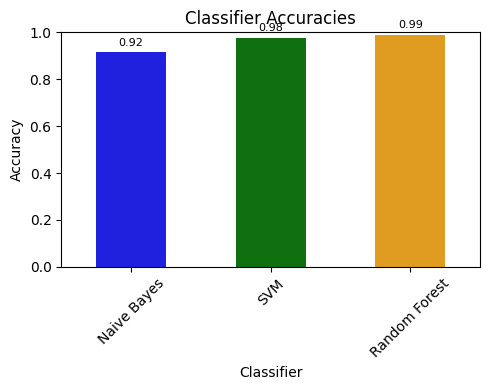

In [ ]:
# Create a bar chart with reduced width to compare accuracies with different colors for each classifier
plt.figure(figsize=(5, 4))
bar_colors = ['blue', 'green', 'orange']  # Add more colors if needed
bar_labels = ['Naive Bayes', 'SVM', 'Random Forest']
bar_width = 0.5  # Adjust the width as needed

bar_plot = sns.barplot(x=bar_labels, y=accuracies, palette=bar_colors, width=bar_width)
plt.title('Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

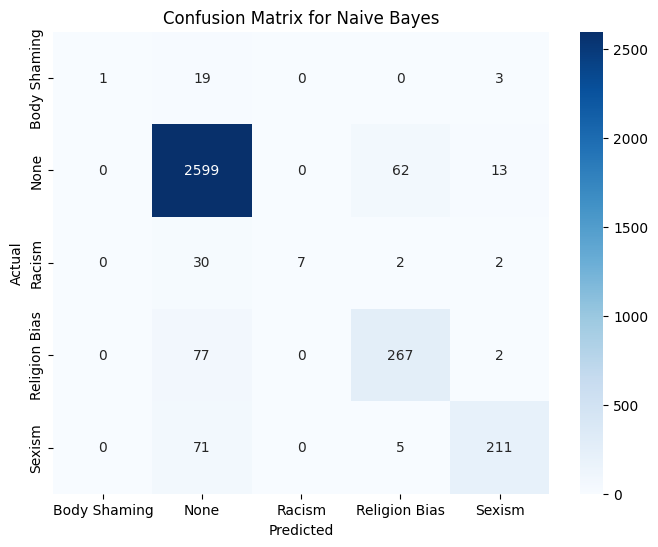

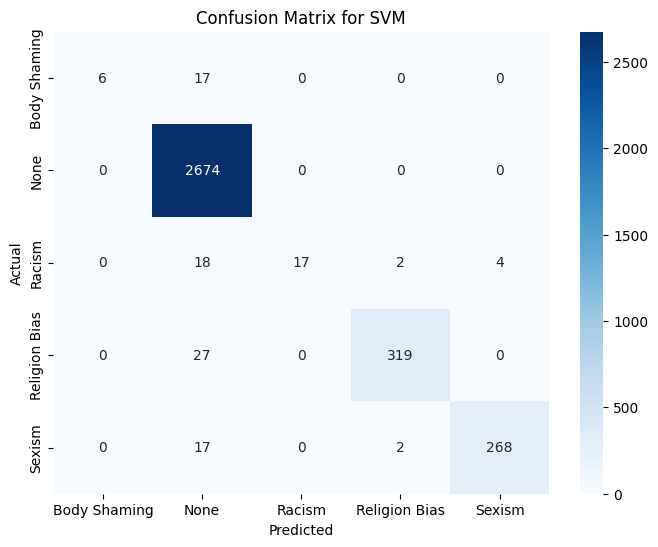

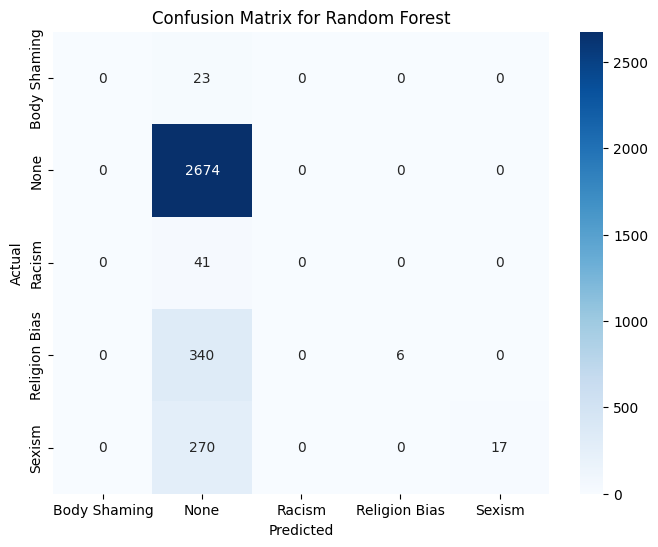

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each classifier
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train_tfidf, y_train)
    predictions = classifier.predict(X_test_tfidf)
    plot_confusion_matrix(y_test, predictions, labels=np.unique(y), title=f'Confusion Matrix for {name}')


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you already have the trained classifiers and test data
# ...

confusion_matrices = []

for classifier, name in zip(classifiers, classifier_names):
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('sampler', over_sampler),  # Try oversampling
        ('tfidf', tfidf_transformer),
        ('classifier', classifier)
    ])

    # ... (previous code remains unchanged)

    # Evaluate the classifier
    predictions = classifier.predict(X_test_tfidf)
    confusion_matrix_text = confusion_matrix(y_test, predictions)

    print(f"{name} Confusion Matrix:")
    print(confusion_matrix_text)
    print("="*50)

    # Append confusion matrix to the list
    confusion_matrices.append((name, confusion_matrix_text))


Naive Bayes Confusion Matrix:
[[   1   19    0    0    3]
 [   0 2599    0   62   13]
 [   0   30    7    2    2]
 [   0   77    0  267    2]
 [   0   71    0    5  211]]
SVM Confusion Matrix:
[[   6   17    0    0    0]
 [   0 2674    0    0    0]
 [   0   18   17    2    4]
 [   0   27    0  319    0]
 [   0   17    0    2  268]]
Random Forest Confusion Matrix:
[[   0   23    0    0    0]
 [   0 2674    0    0    0]
 [   0   41    0    0    0]
 [   0  340    0    6    0]
 [   0  270    0    0   17]]


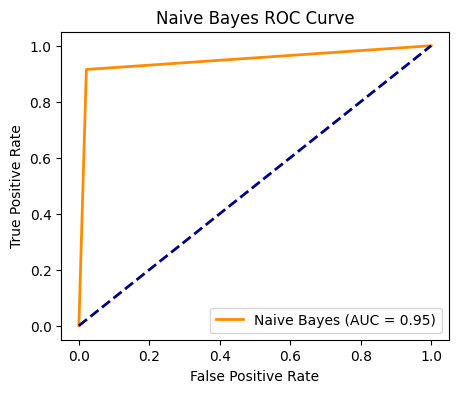

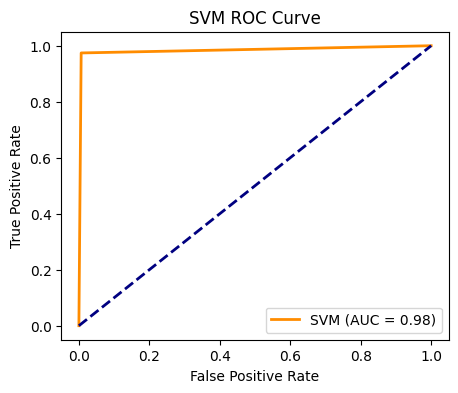

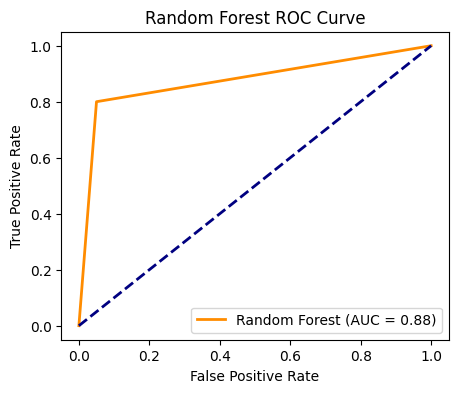

In [ ]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (previous code remains unchanged)

# Create an empty list to store the ROC-AUC scores
roc_auc_scores = []

for classifier, name in zip(classifiers, classifier_names):
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('sampler', over_sampler),  # Try oversampling
        ('tfidf', tfidf_transformer),
        ('classifier', classifier)
    ])

    # ... (previous code remains unchanged)

    # Evaluate the classifier
    predictions = classifier.predict(X_test_tfidf)

    # Binarize the labels for multiclass ROC-AUC calculation
    y_test_bin = label_binarize(y_test, classes=classifier.classes_)
    predictions_bin = label_binarize(predictions, classes=classifier.classes_)

    # Calculate ROC curve and ROC-AUC score
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), predictions_bin.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Append ROC-AUC score to the list
    roc_auc_scores.append((name, roc_auc))


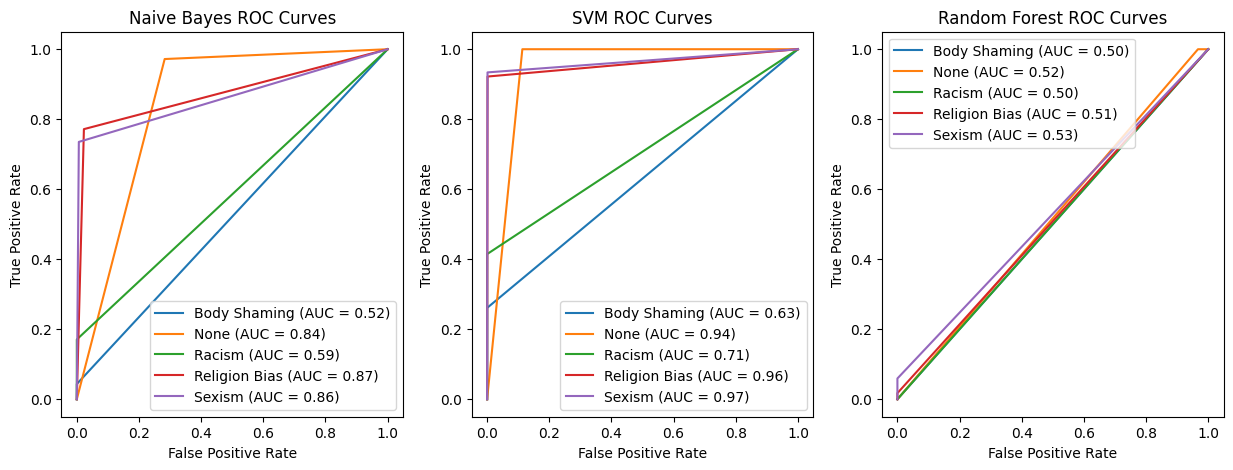

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# ... (previous code remains unchanged)

# Create an empty list to store the ROC-AUC scores
roc_auc_scores = []

# Create a figure to contain the plots
fig, axes = plt.subplots(nrows=1, ncols=len(classifiers), figsize=(15, 5))

for ax, classifier, name in zip(axes, classifiers, classifier_names):
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('sampler', over_sampler),  # Try oversampling
        ('tfidf', tfidf_transformer),
        ('classifier', classifier)
    ])

    # ... (previous code remains unchanged)

    # Evaluate the classifier
    predictions = classifier.predict(X_test_tfidf)

    # Binarize the labels for multiclass ROC-AUC calculation
    y_test_bin = label_binarize(y_test, classes=classifier.classes_)
    predictions_bin = label_binarize(predictions, classes=classifier.classes_)

    # Calculate ROC curve and ROC-AUC score for each class
    for i, class_name in zip(range(len(classifier.classes_)), classifier.classes_):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions_bin[:, i])
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for each class with proper label
        ax.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

    ax.set_title(f'{name} ROC Curves')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()

    # Append ROC-AUC scores to the list
    roc_auc_scores.append((name, roc_auc))

# Display the figure
plt.show()
